In [1]:
import torch
import torchvision
import fastai
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print("fastai:", fastai.__version__)
print("CUDA:", torch.cuda.is_available())


torch: 1.10.2
torchvision: 0.11.3
fastai: 2.6.3
CUDA: True


In [4]:
import torch
print(torch.cuda.is_available())  # True bo'lsa, GPU ishlayotganini bildiradi
print(torch.cuda.current_device())  # Joriy GPU qurilmasining ID'sini ko'rsatadi
print(torch.cuda.get_device_name(0))  # 0-ID ga ega bo'lgan GPU nomini chiqaradi


True
0
NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
from fastai.vision.all import *
from ipywidgets import widgets

path=untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x):return x[0].isupper()

In [6]:
dls=ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

c:\ProgramData\anaconda3\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.161396,0.020219,0.993911,01:03


epoch,train_loss,valid_loss,accuracy,time
0,0.081032,0.021634,0.993234,01:18
1,0.025146,0.014031,0.994587,01:18


In [4]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

True
1.000


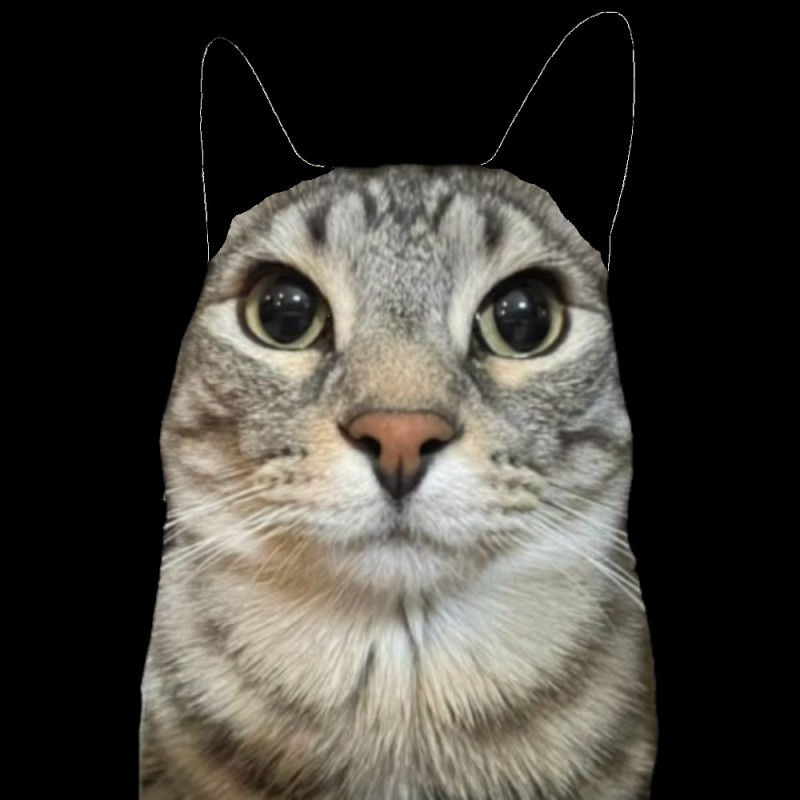

In [8]:
img=PILImage.create(upload.data[-1])
pred, _ ,prob=learn.predict(img)
print(pred)
print(f'{prob[1].item():.3f}')
img